In [7]:
import numpy as np
from ase.visualize import view
from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators.emt import EMT
# Standard Python libraries
from __future__ import (absolute_import, print_function,
                        division, unicode_literals)
from copy import deepcopy
import datetime

# http://www.numpy.org/
import numpy as np

# https://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline

# https://github.com/usnistgov/atomman
import atomman as am
import atomman.unitconvert as uc
from ase.build import fcc111,fcc110,bcc111,bcc110,add_adsorbate
from ase.visualize import view
from ase.build import bulk
from ase.calculators.emt import EMT


/Users/swang/.local/miniconda2/lib/python2.7/site-packages/atomman/tools/istypes.py:20: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(dtype.type, int):


In [74]:
a = 4.0  # approximate lattice constant
atoms = bulk('Al', 'fcc', a=a, cubic=True)
atoms.set_calculator(EMT())

In [75]:
view(atoms, viewer='x3d')

In [76]:
cell = atoms.get_cell()
traj = Trajectory('Al.traj', 'w')
N_conf = 20
for x in np.linspace(0.95, 1.05, N_conf):
    atoms.set_cell(cell * x, scale_atoms=True)
    atoms.get_potential_energy()
    traj.write(atoms)

Lattice constant is 3.9976542062182494 Angstrom
35.632460321993456 GPa


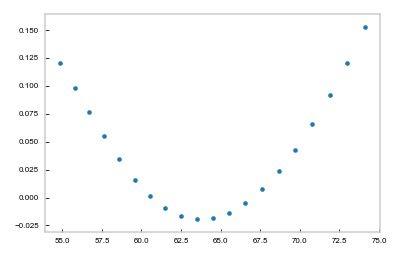

In [77]:
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState
configs = read('Al.traj@0:{}'.format(N_conf))  # read configurations
# Extract volumes and energies:
volumes = [atoms.get_volume() for atoms in configs]
energies = [atoms.get_potential_energy() for atoms in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit() #   E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
a = (v0)**(1 / 3.0)
print("Lattice constant is",a, 'Angstrom')
print(B / kJ * 1.0e24, 'GPa')
plt.scatter(volumes,energies)
#eos.plot('Ag-eos.png')

In [78]:
from ase.build import fcc100, add_adsorbate
from ase.constraints import FixAtoms, FixedPlane
from ase.calculators.emt import EMT
from ase.optimize import QuasiNewton

# 2x2-Al(001) surface with 3 layers and an
# Au atom adsorbed in a hollow site:
slab = fcc100('Al',a =a, size=(4, 3, 3))
add_adsorbate(slab, 'Au', 1.7, 'hollow')
slab.center(axis=2, vacuum=4.0)

In [79]:
view(slab, viewer='x3d')

In [81]:
# Make sure the structure is correct:
#from ase.visualize import view
#view(slab)

# Fix second and third layers:
mask = [atom.tag > 1 for atom in slab]
#print(mask)
fixlayers = FixAtoms(mask=mask)

# Constrain the last atom (Au atom) to move only in the yz-plane:
plane = FixedPlane(-1, (1, 0, 0))

slab.set_constraint([fixlayers, plane])

# Use EMT potential:
slab.set_calculator(EMT())

for i in range(8):
    qn = QuasiNewton(slab, trajectory='mep%d.traj' % i)
    qn.run(fmax=0.05)
    # Move gold atom along x-axis:
    slab[-1].x += slab.get_cell()[0, 0] / 16
    

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 19:25:11        9.143851*       0.4988
BFGSLineSearch:    1[  2] 19:25:11        9.027709*       0.3213
BFGSLineSearch:    2[  4] 19:25:11        9.000991*       0.1567
BFGSLineSearch:    3[  6] 19:25:11        8.987489*       0.0554
BFGSLineSearch:    4[  8] 19:25:11        8.983206*       0.0406
                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 19:25:11        9.378125*       1.6120
BFGSLineSearch:    1[  2] 19:25:12        9.206100*       0.2699
BFGSLineSearch:    2[  4] 19:25:12        9.169883*       0.0882
BFGSLineSearch:    3[  6] 19:25:12        9.149261*       0.0675
BFGSLineSearch:    4[  8] 19:25:12        9.140312*       0.0822
BFGSLineSearch:    5[ 10] 19:25:12        9.134668*       0.0670
BFGSLineSearch:    6[ 12] 19:25:12        9.131239*      